In [48]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [49]:
G = nx.Graph()
edges = [('A','B'), ('B','C'), ('C','D'), ('C','G'), ('C','H'), ('D','F'), ('D','E'), ('E','F'), ('F','G'), ('H','I'), ('H','J'), ('J','K'), ('J','L'), ('K','L'), ('L','M')]
G.add_edges_from(edges)

In [50]:
T = nx.dfs_tree(G, source='A')
T.edges

OutEdgeView([('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'H'), ('D', 'F'), ('F', 'E'), ('F', 'G'), ('H', 'I'), ('H', 'J'), ('J', 'K'), ('K', 'L'), ('L', 'M')])

In [51]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

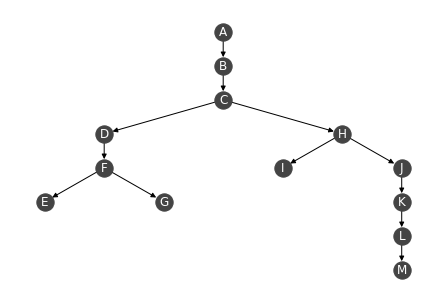

In [53]:
pos = hierarchy_pos(T,'A')    
nx.draw(T, pos=pos, with_labels=True,node_color='#444444',font_color="white")
plt.savefig('hierarchy.png')